In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt

In [13]:
dataTrainSrc = pd.read_csv('../datasets/Music/train.csv')
#dataTestSrc = pd.read_csv('../datasets/Music/test.csv') # Les données de tests ne sont pas labellisées

In [14]:
dataTrainSrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

## 0. Basic cleaning

In [47]:
data = dataTrainSrc.dropna()

In [49]:
data.groupby(by='Class').count()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Class,,,,,,,,,,,,,,,,
0,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386
1,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
2,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956
3,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
4,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
5,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517
6,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039,2039
7,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464
8,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523


In [56]:
X = data.drop(axis=1, columns=['Artist Name', 'Track Name', 'Class']) 
Y = pd.DataFrame(np.where(data['Class']==10, 1, 0)) #Pour simplifier, on étudie seulement le problème binaire, cherchant à détecter si Class = 10 (i.e. Rock)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 1. Decision tree

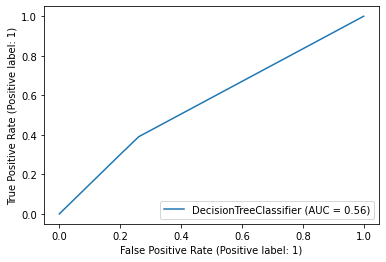

In [59]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
plot_roc_curve(dt, X_test, Y_test)

## 2. SVM Linéaire

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/rbury/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


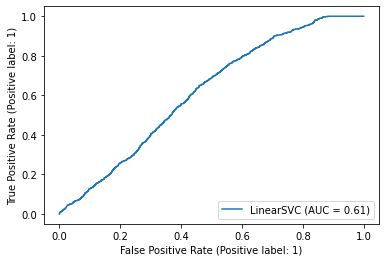

In [60]:
svmLinear = svm.LinearSVC()
svmLinear.fit(X_train, Y_train)
plot_roc_curve(svmLinear, X_test, Y_test)

## 3. SVM avec d'autres Kernel

### RBF

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


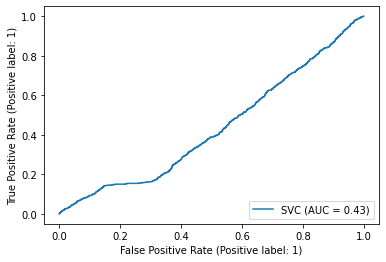

In [61]:
svmRBF = svm.SVC(kernel='rbf')
svmRBF.fit(X_train, Y_train)
plot_roc_curve(svmRBF, X_test, Y_test)

### Polynomial

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


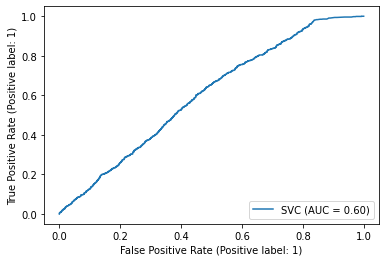

In [62]:
svmPoly = svm.SVC(kernel='poly')
svmPoly.fit(X_train, Y_train)
plot_roc_curve(svmPoly, X_test, Y_test)

## 4. Neural Network

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


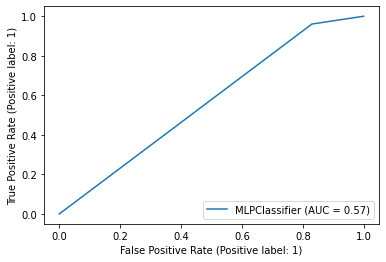

In [63]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/rbury/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


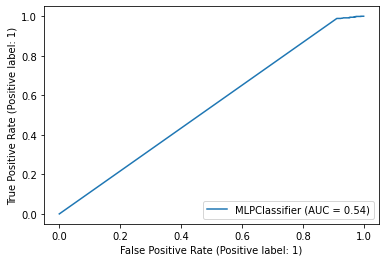

In [66]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)